# Attempt 1 at sentiment analysis

## Install NLTK

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [33]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/vscode/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/vscode/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/vscode/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/vscode/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/vscode/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |

KeyboardInterrupt: 

## Other imports

In [42]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [88]:
# Loading the dataset
df = pd.read_csv('./data/Dataset_10k.csv')
df.head()

,title,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,is_weekend,is_holiday,source_type,final_redirected_URL,domain_of_URL,subdomain_of_URL,URL_depth,top_level_domain,url_length,author
0,Kann künstliche Intelligenz Smalltalk ersetzen...,https://news.google.com/rss/articles/CBMiY2h0d...,2023-11-12,Blick,US,de,Can artificial intelligence replace small talk...,47,8,Sunday,...,True,False,News Outlet,https://www.blick.ch/schweiz/linguistik-profes...,www.blick.ch,www,2,ch,99,[]
1,Lidé se snadněji svěří chatbotům. Emocionální ...,https://news.google.com/rss/articles/CBMidmh0d...,2023-11-12,iDNES.cz,US,cs,People trust chatbots more easily. Emotional A...,72,13,Sunday,...,True,False,Other,https://www.idnes.cz/zpravy/domaci/ai-umela-in...,www.idnes.cz,www,3,cz,118,['Autor']
2,¿Cómo implementar la IA en el comercio online?...,https://news.google.com/rss/articles/CBMicmh0d...,2023-11-12,RRHH Digital,US,es,How to implement AI in online commerce? - Digi...,43,10,Sunday,...,True,False,News Outlet,https://www.rrhhdigital.com/secciones/tecnolog...,www.rrhhdigital.com,www,5,com,114,[]
3,"Kontrolle von KI: Vorsicht, KI! | ZEIT ONLINE ...",https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,ZEIT ONLINE English,US,de,"Controlling AI: Be careful, AI! | ZEIT ONLINE ...",56,12,Sunday,...,True,False,Other,https://www.zeit.de/zeit-wissen/2023/06/kuenst...,www.zeit.de,www,4,de,93,[]
4,Los consejos para ganar la lotería de la Intel...,https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,C5N,US,es,Tips to win the Artificial Intelligence lotter...,45,9,Sunday,...,True,False,Other,https://www.c5n.com/sociedad/los-consejos-gana...,www.c5n.com,www,2,com,93,[]


In [89]:
def clean_title(title):
    # Tokenize the title
    tokens = word_tokenize(title)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    # Join the filtered tokens back into a single string
    cleaned_title = ' '.join(filtered_tokens)
    return cleaned_title

In [90]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()
sentimentScores = pd.DataFrame([sid.polarity_scores(clean_title(sentence)) for sentence in df['title']])
df = pd.concat([df, sentimentScores], axis=1)

In [91]:
# Compute the maximum score among positive, negative, and neutral
max_score = df[['pos', 'neg', 'neu']].max(axis=1)

# Categorize sentiment based on the maximum score
df['sentiment'] = np.where(df['pos'] == max_score, 'positive', 
                   np.where(df['neg'] == max_score, 'negative', 'neutral'))

# Print the result
print(df['sentiment'])

0        neutral
1        neutral
2        neutral
3        neutral
4        neutral
          ...   
9995    positive
9996     neutral
9997     neutral
9998     neutral
9999     neutral
Name: sentiment, Length: 10000, dtype: object


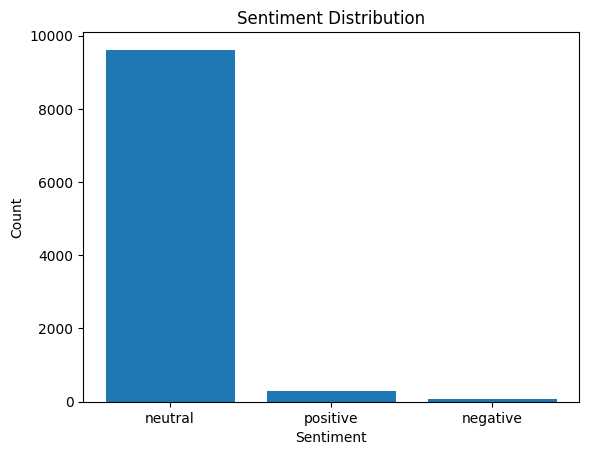

In [99]:
plt.bar(df['sentiment'].value_counts().index, df['sentiment'].value_counts())
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [93]:
df[df['sentiment'] == 'positive']['title'].head(10)

42     Artificial Intelligence: Race for AI Supremacy...
54     Generative AI Companies Love This Stock. Could...
281    AI-generated video tutorials now employer's be...
336    Veteran suicide rates are up — artificial inte...
371    2 Stocks That Could Benefit From Generative AI...
390    Where there’s smoke, Xcel Energy hopes AI will...
414    Best's Review Examines Artificial Intelligence...
419    5 Top Artificial Intelligence Trends in 2024 -...
475             Improving safety in AI - FinTech Futures
527    Shutterstock Unveils TRUST, its Best-in-Class ...
Name: title, dtype: object

In [94]:
df[df['sentiment'] == 'negative']['title'].head(10)

94      No, ChatGPT And Generative AI Won’t Destroy Hu...
279     AI makes you worse at what you’re good at - Te...
283     Psychiatrist jailed over AI-made child sex abu...
348     Spence: Have to Avoid Turing Error in AI - Blo...
361     AI vendors create fear, uncertainty and doubt ...
477     Before worrying about a killer bot, regulators...
479     How CSPs can combat fraud with AI and machine ...
698     AI Predicts Sudden Cardiac Death and Cardiovas...
735     Grimes DJs at event calling for looser AI regu...
1096    Can Artificial Intelligence Kill the iPhone? -...
Name: title, dtype: object

In [98]:
print(df.iloc[2579]['title'])
print(df.iloc[2579]['sentiment'])

AI Platform Predicts Cancer Risk, Tumor Origin With High Accuracy - Cancer Therapy Advisor
negative


## By Source Type

/tmp/ipykernel_7166/962202723.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


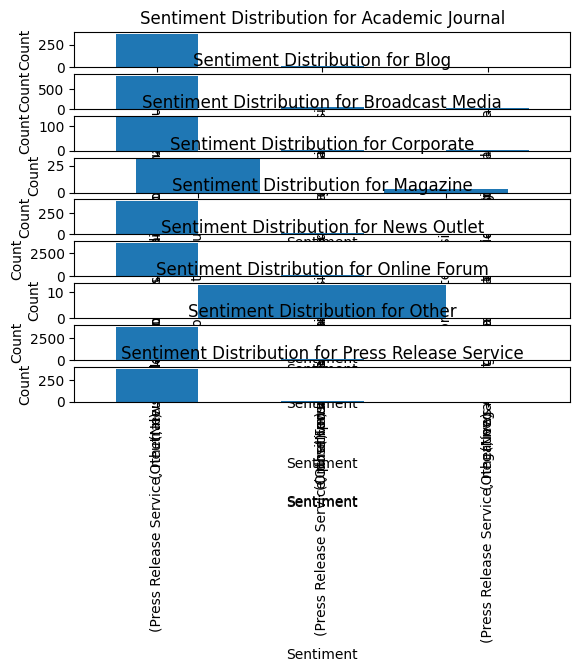

In [96]:
sentiment_counts_by_source = df.groupby('source_type')['sentiment'].value_counts()
fig, axes = plt.subplots(nrows=len(sentiment_counts_by_source.index.levels[0]))

for i, (source_type, sentiment_counts) in enumerate(sentiment_counts_by_source.groupby(level=0)):
    ax = axes[i]
    sentiment_counts.plot(kind='bar', ax=ax)
    ax.set_title(f'Sentiment Distribution for {source_type}')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [97]:
sentiment_counts_by_source = df.groupby('source_type')['sentiment'].value_counts()

for source_type, sentiment_counts in sentiment_counts_by_source.groupby(level=0):
    print(f"Sentiment Distribution for {source_type}:")
    print(sentiment_counts)
    print()
    print()

Sentiment Distribution for Academic Journal:
source_type       sentiment
Academic Journal  neutral      370
                  positive      11
                  negative       1
Name: count, dtype: int64


Sentiment Distribution for Blog:
source_type  sentiment
Blog         neutral      830
             positive      40
             negative       9
Name: count, dtype: int64


Sentiment Distribution for Broadcast Media:
source_type      sentiment
Broadcast Media  neutral      136
                 negative       2
                 positive       2
Name: count, dtype: int64


Sentiment Distribution for Corporate:
source_type  sentiment
Corporate    neutral      31
             positive      3
Name: count, dtype: int64


Sentiment Distribution for Magazine:
source_type  sentiment
Magazine     neutral      386
             positive      18
             negative       4
Name: count, dtype: int64


Sentiment Distribution for News Outlet:
source_type  sentiment
News Outlet  neutral      3606
